In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [5]:
computers = pd.read_csv('/Users/AnirbanGuha/Library/CloudStorage/OneDrive-Personal/Maven Analytics Courses/Data Science in Python - Regression/Course Materials/Data/Computers.csv')


In [6]:
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


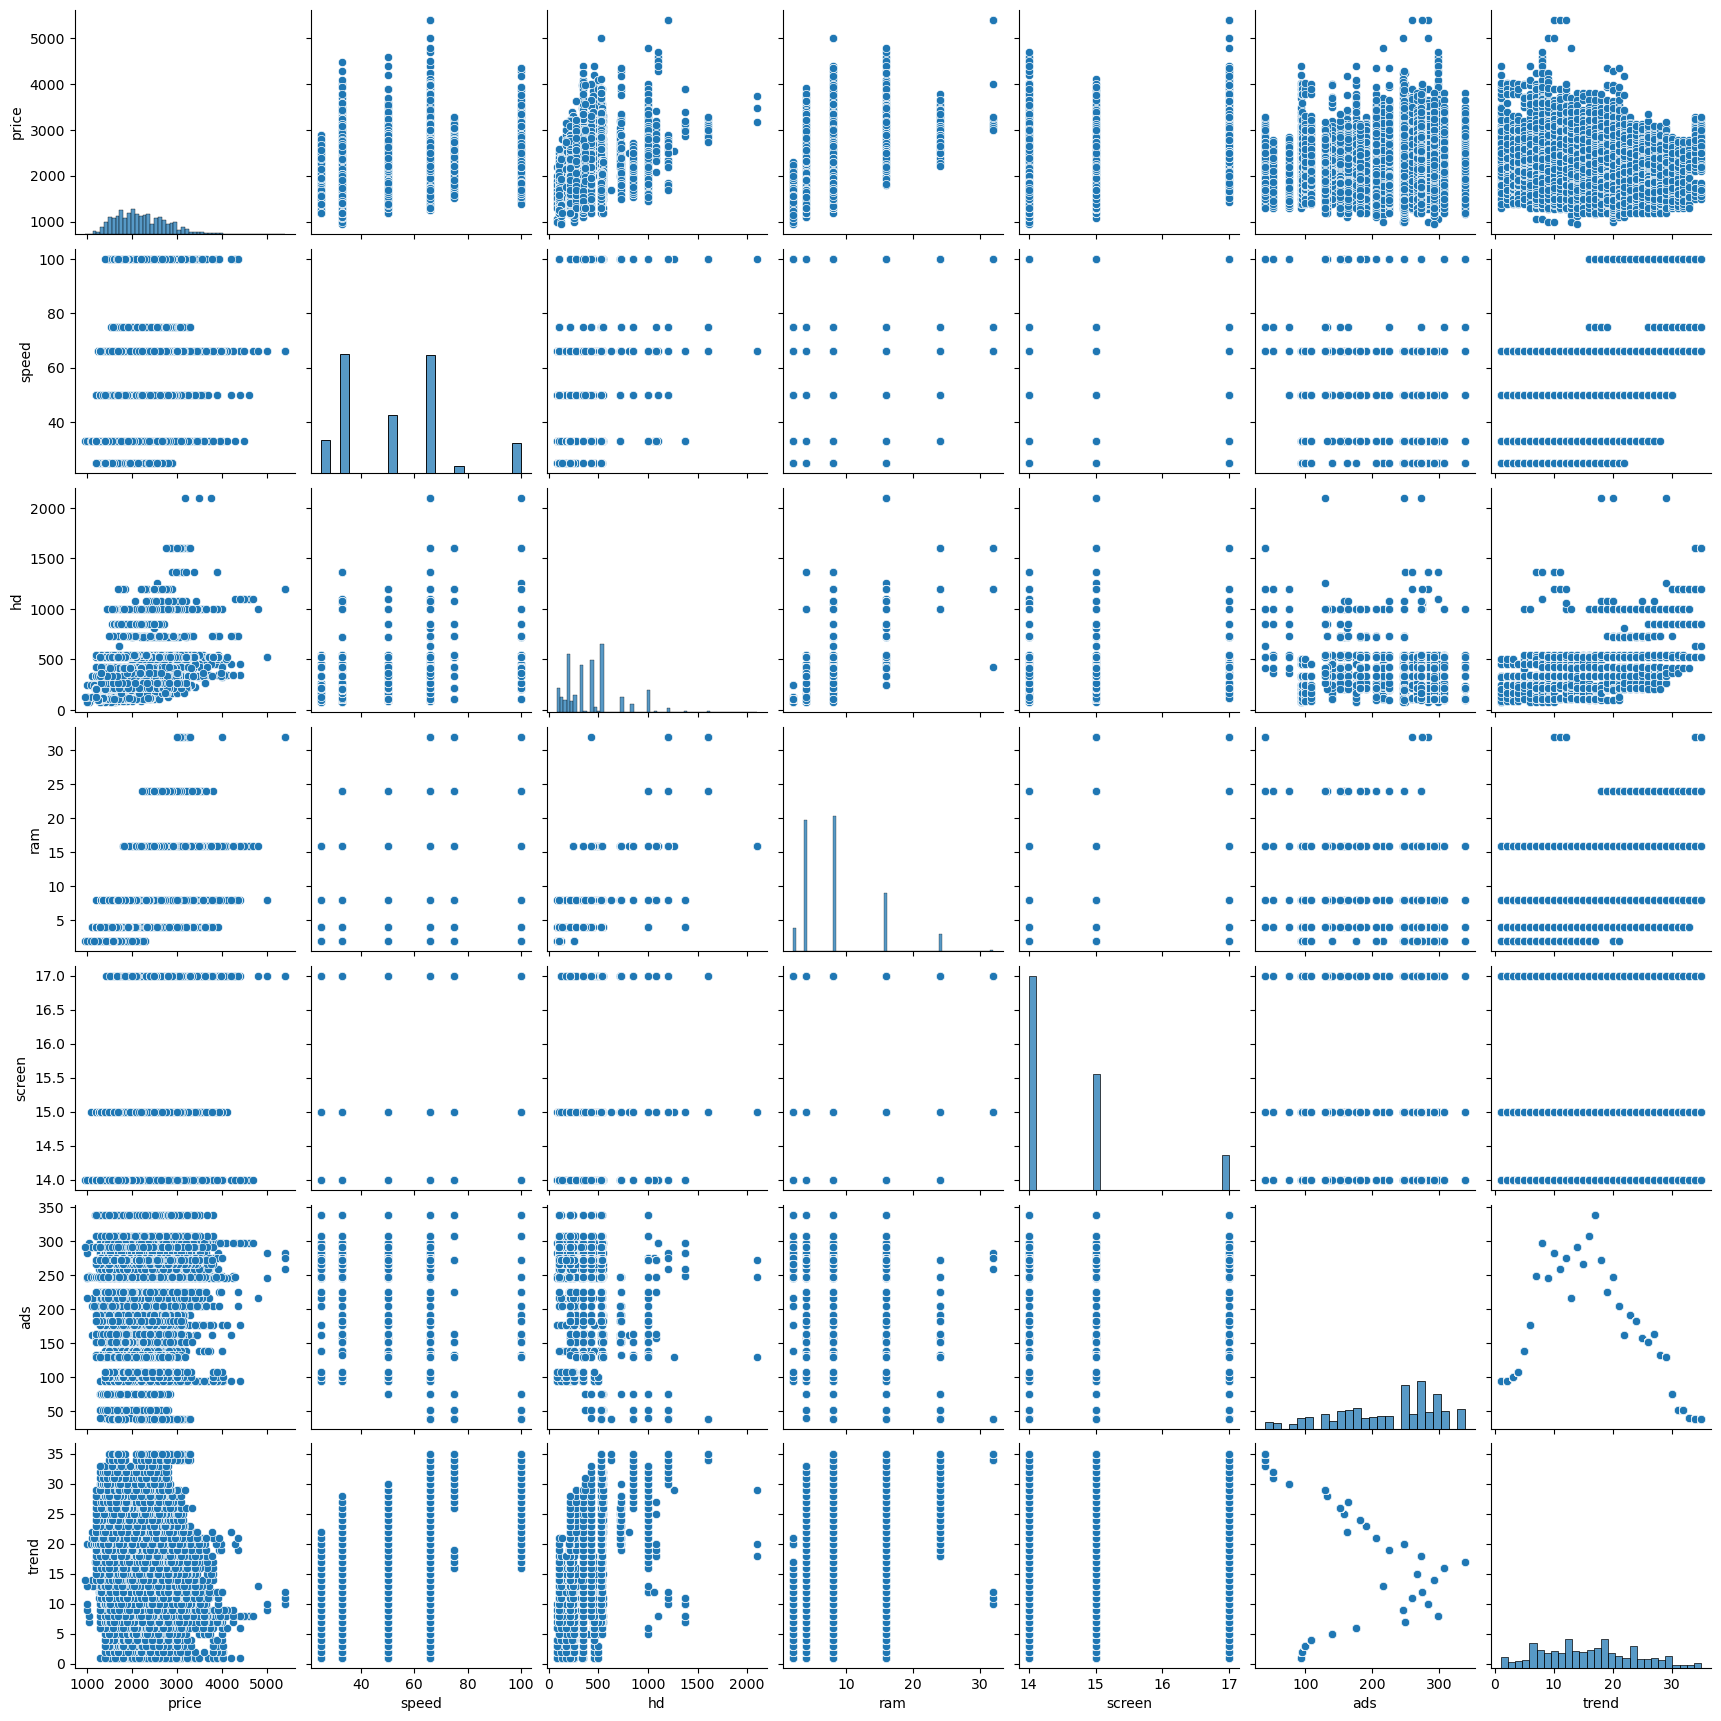

In [10]:
sns.pairplot(computers);

In [14]:
cols = ['ram', 'speed', 'hd', 'screen']

In [15]:
X = sm.add_constant(computers[cols])
y = computers['price']

In [17]:
model = sm.OLS(y ,X).fit()
predictions = model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     1325.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:30:07   Log-Likelihood:                -46795.
No. Observations:                6259   AIC:                         9.360e+04
Df Residuals:                    6254   BIC:                         9.363e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3331     88.222      0.117      0.907    -162.613     183.279
ram           76.7454      1.536     49.969      0.000      73.735      79.756
speed          5.2493      0.278     18.858      0.000       4.704       5.795
hd            -0.5794      0.035    -16.520      0.000      -0.648      -0.511
screen       105.5259      6.189     17.051      0.000      93.394     117.658
==============================================================================
Omnibus:                     1640.957   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5072.066
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       6.503   Cond. No.                     8.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
predictions

array([1879.56146195, 1765.16815787, 1932.94497843, ..., 3264.81060339,
       2853.62301575, 3064.67485455], shape=(6259,))

In [22]:
model.resid

0      -380.561462
1        29.831842
2      -337.944978
3      -285.400859
4       603.132352
           ...    
6254   -736.213347
6255   -452.146833
6256   -610.810603
6257   -658.623016
6258   -574.674855
Length: 6259, dtype: float64

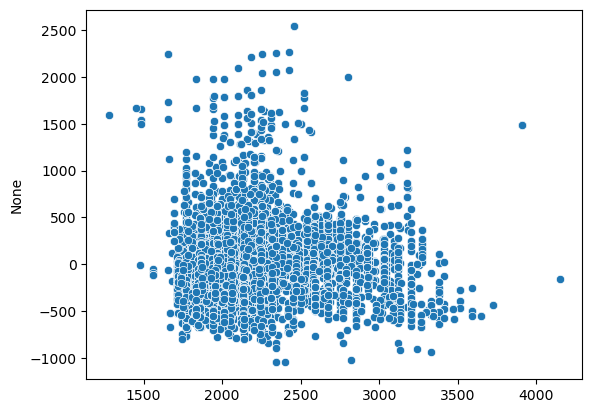

In [24]:
sns.scatterplot(x=model.predict(),y=model.resid);

In [26]:
cols = ['ram', 'speed', 'hd', 'screen', 'ads', 'trend']
X = sm.add_constant(computers[cols])
y = computers['price']

model = sm.OLS(y,X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                        00:36:08   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -246.6755     66.371     -3.717      0.000    -376.785    -116.566
ram           47.3870      1.188     39.899      0.000      45.059      49.715
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

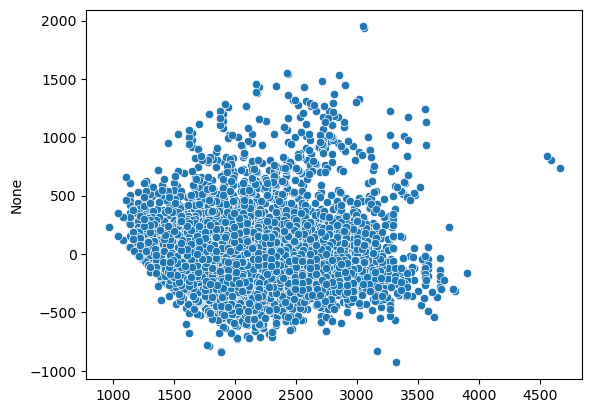

In [27]:
sns.scatterplot(x=model.predict(),y=model.resid);